In [36]:
#1단계
#주제 : 미디어소비유형(전통,디지털)에 따른 제품소비 패턴 분석(기초 통계)
#소비하는 미디어의형태를 파악하기 위해 데이터는 전통과 디지털로 나누고 너무세부적으로 독립변수가많으면 흐려질 수 있으므로
#소비하는 미디어 장르만 파악

#모델 / 기법
# -EDA(데이터탐색)
# - 아노바
# - T-test(독립/표본)

In [37]:
# 인구세그먼트 + 소비현황 합쳐서
# ➤ 성별 / 연령별 / 세대별 미디어 소비 빈도 분석 (기초 통계)

# melt해서 long 포맷 만든 구매미디어 사용데이터랑
# ➤ 제품 실제 구매 여부 있는 사람만 inner join
# ➤ 이 사람들이 주로 사용하는 미디어 유형(디지털/전통) 비교

# ➤ 미디어 소비 유형(전통 중심 vs 디지털 중심 그룹 나누기)
# ➤ 이 그룹 간에 제품 구매 품목 차이, 빈도 차이 비교

# → 주제인: 미디어소비유형에 따른 제품소비패턴과 완전히 잘 맞아.
# (실제로 실무보고서에서 이런 구성 자주 써)



# 📘 t-test (두 집단 평균 차이)
# 예:

# 디지털 중심 vs 전통 중심 그룹으로 나눈 다음

# 각 그룹의 제품 구매 개수 평균 차이 보기
# → → 이때 t-test

# 📗 ANOVA (세 집단 이상 평균 차이)
# 예:

# 연령대별 (20대, 30대, 40대) 사람들의
# 디지털 미디어 이용률 평균이 다르냐?
# → → 이때 ANOVA

In [38]:
import pandas as pd

answer_df = pd.read_csv('2019년 소비자행태조사 원시데이터_답변.csv', encoding = 'utf-8')

answer_df

YEAR  A_001  A_002  A_003  A_004  A_006  A_007  A_009  A_011  A_013  \
0     2019      1      1     14      1      6      6    NaN      1      8   
1     2019      1      1     14      1      6      6    NaN     99      8   
2     2019      1      1     14      1      6      6    NaN      1      8   
3     2019      1      1     14      1      6      8    NaN     99      8   
4     2019      1      1     14      1      6      9    NaN      1      8   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3995  2019      2      5     58      4      4      1    1.0      1      3   
3996  2019      2      6     63      4      5      7    NaN      4      4   
3997  2019      2      6     61      4      4      4    2.0      1      3   
3998  2019      2      6     67      4      4      2    2.0      1      3   
3999  2019      2      6     65      4      5      4    NaN      2      4   

      ...  K_05_015#1  K_05_015#2  K_05_015#3  K_05_015#4  K_05_015#5  \
0     ...           3         NaN         NaN         NaN         NaN   
1     ...           3         NaN         NaN         NaN         NaN   
2     ...           3         6.0         7.0         NaN         NaN   
3     ...           3         4.0         NaN         NaN         NaN   
4     ...           3         NaN         NaN         NaN         NaN   
...   ...         ...         ...         ...         ...         ...   
3995  ...           1         3.0         NaN         NaN         NaN   
3996  ...           3         NaN         NaN         NaN         NaN   
3997  ...           1         3.0         4.0         5.0         NaN   
3998  ...           3         NaN         NaN         NaN         NaN   
3999  ...           3         NaN         NaN         NaN         NaN   

      K_05_015#6  K_05_015#7  K_05_015#8  K_05_015#9  K_05_015#10  
0            NaN         NaN         NaN         NaN          NaN  
1            NaN         NaN         NaN         NaN          NaN  
2            NaN         NaN         NaN         NaN          NaN  
3            NaN         NaN         NaN         NaN          NaN  
4            NaN         NaN         NaN         NaN          NaN  
...          ...         ...         ...         ...          ...  
3995         NaN         NaN         NaN         NaN          NaN  
3996         NaN         NaN         NaN         NaN          NaN  
3997         NaN         NaN         NaN         NaN          NaN  
3998         NaN         NaN         NaN         NaN          NaN  
3999         NaN         NaN         NaN         NaN          NaN  

[4000 rows x 3624 columns]

In [39]:
question_df = pd.read_csv('2019년 소비자행태조사 원시데이터_문항,보기.csv', encoding = 'utf-8')

question_df

항목ID                항목명     항목분류 항목유형  \
0            YEAR               조사년도     DEMO   단수   
1           A_001                 성별     DEMO   단수   
2           A_002            연령(10대)     DEMO   단수   
3           A_003             연령(1세)     DEMO  주관식   
4           A_004             지역(권역)     DEMO   단수   
...           ...                ...      ...  ...   
3618   K_05_015#6  평소 즐겨 보는 뉴스 및 콘텐츠  기타>나쁜광고   복수   
3619   K_05_015#7  평소 즐겨 보는 뉴스 및 콘텐츠  기타>나쁜광고   복수   
3620   K_05_015#8  평소 즐겨 보는 뉴스 및 콘텐츠  기타>나쁜광고   복수   
3621   K_05_015#9  평소 즐겨 보는 뉴스 및 콘텐츠  기타>나쁜광고   복수   
3622  K_05_015#10  평소 즐겨 보는 뉴스 및 콘텐츠  기타>나쁜광고   복수   

                                                   항목설명  
0                                                  <없음>  
1                                        귀하의 성별은 무엇입니까?  
2                                        귀하의 연령은 무엇입니까?  
3                                      귀하의 상세연령은 무엇입니까?  
4                                 현재 거주하고 계신 지역은 어디인가요?  
...                                                 ...  
3618  귀하께서 평소 자주 보거나 즐겨 이용하는 뉴스(또는 콘텐츠)를 모두 선택해주십시오....  
3619  귀하께서 평소 자주 보거나 즐겨 이용하는 뉴스(또는 콘텐츠)를 모두 선택해주십시오....  
3620  귀하께서 평소 자주 보거나 즐겨 이용하는 뉴스(또는 콘텐츠)를 모두 선택해주십시오....  
3621  귀하께서 평소 자주 보거나 즐겨 이용하는 뉴스(또는 콘텐츠)를 모두 선택해주십시오....  
3622  귀하께서 평소 자주 보거나 즐겨 이용하는 뉴스(또는 콘텐츠)를 모두 선택해주십시오....  

[3623 rows x 5 columns]

In [40]:
q_li = question_df['항목설명'].to_list()

q_key = question_df['항목ID'].to_list()
a_key = answer_df.columns.to_list()

In [41]:
print(len(a_key)) #3624
print(len(q_key)) #3623

com = []
del_c = []
for i in a_key:
    if i in q_key:
        com.append(i)
    else:
        del_c.append(i)

3624
3623


In [42]:
#이미 리스트이기때문에 리스트자체로전달하면 알아서 리스트안에 있는 컬럼만 남음
answer_df = answer_df[com]

answer_df

YEAR  A_001  A_002  A_003  A_004  A_006  A_007  A_009  A_011  A_013  \
0     2019      1      1     14      1      6      6    NaN      1      8   
1     2019      1      1     14      1      6      6    NaN     99      8   
2     2019      1      1     14      1      6      6    NaN      1      8   
3     2019      1      1     14      1      6      8    NaN     99      8   
4     2019      1      1     14      1      6      9    NaN      1      8   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3995  2019      2      5     58      4      4      1    1.0      1      3   
3996  2019      2      6     63      4      5      7    NaN      4      4   
3997  2019      2      6     61      4      4      4    2.0      1      3   
3998  2019      2      6     67      4      4      2    2.0      1      3   
3999  2019      2      6     65      4      5      4    NaN      2      4   

      ...  K_05_015#1  K_05_015#2  K_05_015#3  K_05_015#4  K_05_015#5  \
0     ...           3         NaN         NaN         NaN         NaN   
1     ...           3         NaN         NaN         NaN         NaN   
2     ...           3         6.0         7.0         NaN         NaN   
3     ...           3         4.0         NaN         NaN         NaN   
4     ...           3         NaN         NaN         NaN         NaN   
...   ...         ...         ...         ...         ...         ...   
3995  ...           1         3.0         NaN         NaN         NaN   
3996  ...           3         NaN         NaN         NaN         NaN   
3997  ...           1         3.0         4.0         5.0         NaN   
3998  ...           3         NaN         NaN         NaN         NaN   
3999  ...           3         NaN         NaN         NaN         NaN   

      K_05_015#6  K_05_015#7  K_05_015#8  K_05_015#9  K_05_015#10  
0            NaN         NaN         NaN         NaN          NaN  
1            NaN         NaN         NaN         NaN          NaN  
2            NaN         NaN         NaN         NaN          NaN  
3            NaN         NaN         NaN         NaN          NaN  
4            NaN         NaN         NaN         NaN          NaN  
...          ...         ...         ...         ...          ...  
3995         NaN         NaN         NaN         NaN          NaN  
3996         NaN         NaN         NaN         NaN          NaN  
3997         NaN         NaN         NaN         NaN          NaN  
3998         NaN         NaN         NaN         NaN          NaN  
3999         NaN         NaN         NaN         NaN          NaN  

[4000 rows x 3623 columns]

In [43]:
#항목이름으로 컬럼명 바꿔주기
#zip로 딕셔너리 만들면 자동으로 키:벨류 값으로 딕셔너리 생성
#파이썬 rename함수 사용해서 컬럼바꾸기
#rename(cloumns = {기존 컬럼 : 바꿀컬럼}) #인수를 index로 설정하면 인덱스를 바꿀수있고 반드시 implace해주어야함 
#이미 딕셔너리형태로 존재한다면 column={}형태로 작성할 필요없고 columns = 딕셔너리 형태로 전달해도됨

index_col = dict(zip(q_key , question_df['항목설명']))
answer_df.rename(columns = index_col, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_9808\2624672976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_df.rename(columns = index_col, inplace = True)


In [44]:
answer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 3623 entries, <없음> to 귀하께서 평소 자주 보거나 즐겨 이용하는 뉴스(또는 콘텐츠)를 모두 선택해주십시오. (복수 응답 가능)
dtypes: float64(3191), int64(432)
memory usage: 110.6 MB


In [45]:
answer_df 

<없음>  귀하의 성별은 무엇입니까?  귀하의 연령은 무엇입니까?  귀하의 상세연령은 무엇입니까?  \
0     2019               1               1                14   
1     2019               1               1                14   
2     2019               1               1                14   
3     2019               1               1                14   
4     2019               1               1                14   
...    ...             ...             ...               ...   
3995  2019               2               5                58   
3996  2019               2               6                63   
3997  2019               2               6                61   
3998  2019               2               6                67   
3999  2019               2               6                65   

      현재 거주하고 계신 지역은 어디인가요?  귀하의 직업은 무엇입니까?  귀댁의 월평균 소득은 얼마나 됩니까?  \
0                         1               6                     6   
1                         1               6                     6   
2                         1               6                     6   
3                         1               6                     8   
4                         1               6                     9   
...                     ...             ...                   ...   
3995                      4               4                     1   
3996                      4               5                     7   
3997                      4               4                     4   
3998                      4               4                     2   
3999                      4               5                     4   

      귀하 본인의 월 평균 소득은 얼마입니까?  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   
...                      ...   
3995                     1.0   
3996                     NaN   
3997                     2.0   
3998                     2.0   
3999                     NaN   

      귀하께서는 한 달 평균 신용카드와 체크카드를 합쳐서 얼마 정도 사용하시나요? 주 사용 카드 뿐만 아니라 본인 이름으로 된 모든 카드의 월평균 사용액을 합해 말씀해주십시오.  \
0                                                     1                                                 
1                                                    99                                                 
2                                                     1                                                 
3                                                    99                                                 
4                                                     1                                                 
...                                                 ...                                                 
3995                                                  1                                                 
3996                                                  4                                                 
3997                                                  1                                                 
3998                                                  1                                                 
3999                                                  2                                                 

      귀하의 최종 학력은 어떻게 되십니까?  ...  \
0                        8  ...   
1                        8  ...   
2                        8  ...   
3                        8  ...   
4                        8  ...   
...                    ...  ...   
3995                     3  ...   
3996                     4  ...   
3997                     3  ...   
3998                     3  ...   
3999                     4  ...   

      귀하께서 평소 자주 보거나 즐겨 이용하는 뉴스(또는 콘텐츠)를 모두 선택해주십시오. (복수 응답 가능)  \
0                                                     3           
1                                                     3           
2                                                     3           
3                                                     3           
4     

In [46]:
print(type(str))     # <class 'type'>
print(type(range))   # <class 'type'>
print(type(list))    # <class 'type'>

<class 'type'>
<class 'type'>
<class 'type'>


In [47]:
#개인식별고유키 만들기

key = ['A'+str(x) for x in range(1,4001)]
print(key)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A138', 'A1

In [48]:
#인구세그먼트 데이터

e_li = ['귀하의 성별은 무엇입니까?','귀하의 연령은 무엇입니까?','현재 거주하고 계신 지역은 어디인가요?',
'귀하의 직업은 무엇입니까?','귀하 본인의 월 평균 소득은 얼마입니까?',
'귀하께서는 한 달 평균 신용카드와 체크카드를 합쳐서 얼마 정도 사용하시나요? 주 사용 카드 뿐만 아니라 본인 이름으로 된 모든 카드의 월평균 사용액을 합해 말씀해주십시오.',
'귀하의 최종 학력은 어떻게 되십니까?','귀하는 현재 정기적인 월 소득이 있으십니까?',
'귀댁의 주택형태는 어떻게 되십니까?','귀하는 현재 결혼을 하셨습니까?','귀하는 자녀가 있으십니까?']

engagement = answer_df[e_li]

new_li = ['성별','연령','거주지',
'직업','월평균소득','월평균카드사용액','최종학력','정기적인월소득여부','주택형태','결혼여부','자녀여부']

new_col = dict(zip(e_li, new_li))

engagement = engagement.rename(columns = new_col)

engagement['key'] = key
engagement

성별  연령  거주지  직업  월평균소득  월평균카드사용액  최종학력  정기적인월소득여부  주택형태  결혼여부  자녀여부  \
0      1   1    1   6    NaN         1     8          2     3     2     1   
1      1   1    1   6    NaN        99     8          2     2     2     1   
2      1   1    1   6    NaN         1     8          2     2     2     1   
3      1   1    1   6    NaN        99     8          2     2     2     1   
4      1   1    1   6    NaN         1     8          2     2     2     1   
...   ..  ..  ...  ..    ...       ...   ...        ...   ...   ...   ...   
3995   2   5    4   4    1.0         1     3          1     3     3     2   
3996   2   6    4   5    NaN         4     4          2     1     1     2   
3997   2   6    4   4    2.0         1     3          1     1     1     2   
3998   2   6    4   4    2.0         1     3          1     3     3     2   
3999   2   6    4   5    NaN         2     4          2     1     1     2   

        key  
0        A1  
1        A2  
2        A3  
3        A4  
4        A5  
...     ...  
3995  A3996  
3996  A3997  
3997  A3998  
3998  A3999  
3999  A4000  

[4000 rows x 12 columns]

In [49]:
media = pd.read_csv('2019년 소비자행태조사_미디어소비행태.csv', encoding = 'utf-8')

media.drop('C_01_011', axis = 1, inplace = True)

print(media.columns)

Index(['C_02_002', 'C_03_002', 'C_04_009', 'C_06_008', 'C_09_001', 'C_10_016',
       'C_12_002', 'C_13_006', 'C_15_002', 'C_16_004', 'C_17_003', 'C_20_001'],
      dtype='object')


In [50]:
me_li = ['지상파TV 주 시청빈도', '종편 시청빈도', '케이블 TV 시청빈도', 'IPTV VOD 서비스 이용빈도', '라디오 청취 빈도',
          'DMB시청 빈도', '인터넷 이용빈도', '모바일 인터넷 이용빈도', 'SNS이용 빈도', '신문/인터넷 신문 열독빈도', 
          '인터넷 및 종이잡지 읽은 빈도', '온라인 동영상 시청 빈도']

me_do = dict(zip(media.columns, me_li))

media.rename(columns = me_do, inplace = True)

# 1: 매일(1주에 7일)
# 2: 1주에 5~6일
# 3: 1주에 3~4일
# 4: 1주에 1~2일
# 5: 한달에 1~3일
# 6: 거의 안본다

In [51]:
media['key'] = key

media

지상파TV 주 시청빈도  종편 시청빈도  케이블 TV 시청빈도  IPTV VOD 서비스 이용빈도  라디오 청취 빈도  \
0                5        4            1                  6          6   
1                1        4            4                  5          6   
2                1        1            3                  6          6   
3                4        4            4                  6          6   
4                3        3            1                  5          6   
...            ...      ...          ...                ...        ...   
3995             1        1            1                  3          3   
3996             2        2            3                  6          6   
3997             1        3            3                  6          4   
3998             3        3            3                  6          6   
3999             2        3            3                  6          6   

      DMB시청 빈도  인터넷 이용빈도  모바일 인터넷 이용빈도  SNS이용 빈도  신문/인터넷 신문 열독빈도  \
0            6       4.0           1.0         6               6   
1            6       3.0           1.0         6               6   
2            6       1.0           1.0         4               3   
3            6       6.0           3.0         1               6   
4            6       4.0           1.0         1               6   
...        ...       ...           ...       ...             ...   
3995         4       6.0           5.0         1               6   
3996         6       6.0           2.0         6               6   
3997         6       6.0           5.0         2               6   
3998         6       6.0           4.0         6               4   
3999         6       6.0           3.0         4               4   

      인터넷 및 종이잡지 읽은 빈도  온라인 동영상 시청 빈도    key  
0                    6              4     A1  
1                    6              4     A2  
2                    6              4     A3  
3                    6              6     A4  
4                    6              1     A5  
...                ...            ...    ...  
3995                 6              4  A3996  
3996                 6              6  A3997  
3997                 6              6  A3998  
3998                 6              6  A3999  
3999                 6              6  A4000  

[4000 rows x 13 columns]

In [52]:
media.fillna(0,inplace = True)

In [53]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   지상파TV 주 시청빈도       4000 non-null   int64  
 1   종편 시청빈도            4000 non-null   int64  
 2   케이블 TV 시청빈도        4000 non-null   int64  
 3   IPTV VOD 서비스 이용빈도  4000 non-null   int64  
 4   라디오 청취 빈도          4000 non-null   int64  
 5   DMB시청 빈도           4000 non-null   int64  
 6   인터넷 이용빈도           4000 non-null   float64
 7   모바일 인터넷 이용빈도       4000 non-null   float64
 8   SNS이용 빈도           4000 non-null   int64  
 9   신문/인터넷 신문 열독빈도     4000 non-null   int64  
 10  인터넷 및 종이잡지 읽은 빈도   4000 non-null   int64  
 11  온라인 동영상 시청 빈도      4000 non-null   int64  
 12  key                4000 non-null   object 
dtypes: float64(2), int64(10), object(1)
memory usage: 406.4+ KB


In [54]:
#광고 소비패턴 (전통이랑 미디어 합쳐서..)

ad_df = pd.read_csv('2019년 소비자행태조사 원시데이터_광고소비태도.csv', encoding = 'utf-8')

ad_df

E_001#1  E_001#2  E_001#3  E_001#4  E_001#5  E_001#6  E_001#7  E_001#8  \
0          21      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1           1      8.0     25.0     28.0      NaN      NaN      NaN      NaN   
2           8     26.0     30.0      NaN      NaN      NaN      NaN      NaN   
3           2     11.0     12.0     15.0     17.0     20.0     25.0     29.0   
4          22     28.0      NaN      NaN      NaN      NaN      NaN      NaN   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3995        1      2.0      3.0     23.0      NaN      NaN      NaN      NaN   
3996       26     30.0      NaN      NaN      NaN      NaN      NaN      NaN   
3997        2     16.0     27.0     30.0      NaN      NaN      NaN      NaN   
3998       26     27.0     30.0      NaN      NaN      NaN      NaN      NaN   
3999       26     27.0     30.0      NaN      NaN      NaN      NaN      NaN   

      E_001#9  E_001#10  ...  E_004#27  E_004#28  E_004#29  E_004#30  \
0         NaN       NaN  ...       NaN       NaN       NaN       NaN   
1         NaN       NaN  ...       NaN       NaN       NaN       NaN   
2         NaN       NaN  ...       NaN       NaN       NaN       NaN   
3         NaN       NaN  ...       NaN       NaN       NaN       NaN   
4         NaN       NaN  ...       NaN       NaN       NaN       NaN   
...       ...       ...  ...       ...       ...       ...       ...   
3995      NaN       NaN  ...       NaN       NaN       NaN       NaN   
3996      NaN       NaN  ...       NaN       NaN       NaN       NaN   
3997      NaN       NaN  ...       NaN       NaN       NaN       NaN   
3998      NaN       NaN  ...       NaN       NaN       NaN       NaN   
3999      NaN       NaN  ...       NaN       NaN       NaN       NaN   

      E_004#31  E_004#32  E_004#33  E_004#34  E_004#35  E_004#36  
0          NaN       NaN       NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN       NaN       NaN  
...        ...       ...       ...       ...       ...       ...  
3995       NaN       NaN       NaN       NaN       NaN       NaN  
3996       NaN       NaN       NaN       NaN       NaN       NaN  
3997       NaN       NaN       NaN       NaN       NaN       NaN  
3998       NaN       NaN       NaN       NaN       NaN       NaN  
3999       NaN       NaN       NaN       NaN       NaN       NaN  

[4000 rows x 144 columns]

In [55]:
ad_li = list(ad_df.columns) 
# ad_li1 = ['제품(브랜드)정보매체']*36 + ['제품(브랜드)매력매체']* 36 + ['제품(브랜드)구매매체']* 36 + ['제품인지매체']* 36
ad_li1 = ['제품(브랜드)정보매체_'+str(x) for x in range(1,37)]
ad_li2 = ['제품(브랜드)매력매체_'+str(x) for x in range(1,37)]
ad_li3 = ['제품(브랜드)구매매체_'+str(x) for x in range(1,37)]
ad_li4 = ['제품(브랜드)인지매체_'+str(x) for x in range(1,37)]

ad_li1.extend(ad_li2)
ad_li1.extend(ad_li3)
ad_li1.extend(ad_li4)

# print(ad_li1)

ad_col = dict(zip(ad_li,ad_li1))

ad_df.rename(columns = ad_col, inplace = True)
ad_df


#1	TV 광고
#2	드라마 등 TV프로그램 속 간접광고(PPL)
#3	라디오 광고
#4	신문 광고
#5	신문 기사
#6	잡지 광고
#7	잡지 기사
#8	제품 카달로그/전단지
#9	광고 우편물/명세서 등
#10	배너 광고
# 11	팝업 광고
# 12	동영상 광고 (동영상 재생 전후 등)
# 13	검색어/키워드 광고
# 14	인터넷 기사
# 15	SNS(페이스북, 인스타그램, 트위터 등) 광고/홍보
# 16	SNS, 블로그 사용자 후기 및 전문가 리뷰
# 17	포털 카페 및 커뮤니티(네이버, 다음 등)
# 18	가격비교사이트 및 제품 관련 전문사이트
# 19	해당 제품/매장 웹사이트
# 20	이메일 광고/뉴스레터 등
# 21	건물 외벽/옥상, 역사 및 정류장 광고
# 22	버스, 택시, 지하철 광고
# 23	영화관, 스포츠 경기장, 공연장 등 광고
# 24	매장 간판 및 외관 광고물
# 25	매장 내 광고(POP)
# 26	판매원(점원) 추천
# 27	샘플/구매 사은품
# 28	쿠폰/프로모션 등 행사 및 이벤트
# 29	매장 내 진열제품 및 제품정보
# 30	주변사람(친구/가족/동료)의 추천
# 31	회사의 사회공헌 및 기여활동
# 32	게임 또는 스포츠 팀 후원
# 33	TV프로그램 후원 및 영화 제작 투자
# 34	신제품발표회/무역박람회/전시회
# 98	기타
# 99	없음

ad_df['key'] = key 

ad_df

제품(브랜드)정보매체_1  제품(브랜드)정보매체_2  제품(브랜드)정보매체_3  제품(브랜드)정보매체_4  \
0                21            NaN            NaN            NaN   
1                 1            8.0           25.0           28.0   
2                 8           26.0           30.0            NaN   
3                 2           11.0           12.0           15.0   
4                22           28.0            NaN            NaN   
...             ...            ...            ...            ...   
3995              1            2.0            3.0           23.0   
3996             26           30.0            NaN            NaN   
3997              2           16.0           27.0           30.0   
3998             26           27.0           30.0            NaN   
3999             26           27.0           30.0            NaN   

      제품(브랜드)정보매체_5  제품(브랜드)정보매체_6  제품(브랜드)정보매체_7  제품(브랜드)정보매체_8  \
0               NaN            NaN            NaN            NaN   
1               NaN            NaN            NaN            NaN   
2               NaN            NaN            NaN            NaN   
3              17.0           20.0           25.0           29.0   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
3995            NaN            NaN            NaN            NaN   
3996            NaN            NaN            NaN            NaN   
3997            NaN            NaN            NaN            NaN   
3998            NaN            NaN            NaN            NaN   
3999            NaN            NaN            NaN            NaN   

      제품(브랜드)정보매체_9  제품(브랜드)정보매체_10  ...  제품(브랜드)인지매체_28  제품(브랜드)인지매체_29  \
0               NaN             NaN  ...             NaN             NaN   
1               NaN             NaN  ...             NaN             NaN   
2               NaN             NaN  ...             NaN             NaN   
3               NaN             NaN  ...             NaN             NaN   
4               NaN             NaN  ...             NaN             NaN   
...             ...             ...  ...             ...             ...   
3995            NaN             NaN  ...             NaN             NaN   
3996            NaN             NaN  ...             NaN             NaN   
3997            NaN             NaN  ...             NaN             NaN   
3998            NaN             NaN  ...             NaN             NaN   
3999            NaN             NaN  ...             NaN             NaN   

      제품(브랜드)인지매체_30  제품(브랜드)인지매체_31  제품(브랜드)인지매체_32  제품(브랜드)인지매체_33  \
0                NaN             NaN             NaN             NaN   
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
3995             NaN             NaN             NaN             NaN   
3996             NaN             NaN             NaN             NaN   
3997             NaN             NaN             NaN             NaN   
3998             NaN             NaN             NaN             NaN   
3999             NaN             NaN             NaN             NaN   

      제품(브랜드)인지매체_34  제품(브랜드)인지매체_35  제품(브랜드)인지매체_36    key  
0                NaN             NaN             NaN     A1  
1                NaN             NaN             NaN     A2  
2                NaN             NaN             NaN     A3  
3                NaN             NaN             NaN     A4  
4                NaN             NaN             NaN     A5  
...              ...             ...             ...    ...  
3995             NaN             NaN             NaN  A3996  
3996             NaN             NaN             NaN  A3997  
3997             NaN             NaN

In [56]:
#키값 1열로 만들기위해 컬럼 순서바꾸기

engagement = engagement[['key','성별', '연령', '거주지', '직업', '월평균소득', '월평균카드사용액', '최종학력', 
                         '정기적인월소득여부', '주택형태', '결혼여부', '자녀여부']]


engagement

key  성별  연령  거주지  직업  월평균소득  월평균카드사용액  최종학력  정기적인월소득여부  주택형태  결혼여부  \
0        A1   1   1    1   6    NaN         1     8          2     3     2   
1        A2   1   1    1   6    NaN        99     8          2     2     2   
2        A3   1   1    1   6    NaN         1     8          2     2     2   
3        A4   1   1    1   6    NaN        99     8          2     2     2   
4        A5   1   1    1   6    NaN         1     8          2     2     2   
...     ...  ..  ..  ...  ..    ...       ...   ...        ...   ...   ...   
3995  A3996   2   5    4   4    1.0         1     3          1     3     3   
3996  A3997   2   6    4   5    NaN         4     4          2     1     1   
3997  A3998   2   6    4   4    2.0         1     3          1     1     1   
3998  A3999   2   6    4   4    2.0         1     3          1     3     3   
3999  A4000   2   6    4   5    NaN         2     4          2     1     1   

      자녀여부  
0        1  
1        1  
2        1  
3        1  
4        1  
...    ...  
3995     2  
3996     2  
3997     2  
3998     2  
3999     2  

[4000 rows x 12 columns]

In [57]:
#merge이용해서 key기준으로 데이터프레임3개 합쳐주어야함
import pandas as pd

# engagement : 인구세그먼트 데이터
# media : 미디어종류별(전통 / 디지털) 시청 빈도
# ad_df : 제품구매에 영향을 준 미디어 매체

#인구세그먼트 데이터 left기준으로 합치기


total_df = engagement.merge(media ,on = 'key', how = 'left')
total_df = total_df.merge(ad_df, on = 'key', how = 'left')
 

# total_df = total_df[[]] 

li = list(total_df.columns)

total_df

key  성별  연령  거주지  직업  월평균소득  월평균카드사용액  최종학력  정기적인월소득여부  주택형태  ...  \
0        A1   1   1    1   6    NaN         1     8          2     3  ...   
1        A2   1   1    1   6    NaN        99     8          2     2  ...   
2        A3   1   1    1   6    NaN         1     8          2     2  ...   
3        A4   1   1    1   6    NaN        99     8          2     2  ...   
4        A5   1   1    1   6    NaN         1     8          2     2  ...   
...     ...  ..  ..  ...  ..    ...       ...   ...        ...   ...  ...   
3995  A3996   2   5    4   4    1.0         1     3          1     3  ...   
3996  A3997   2   6    4   5    NaN         4     4          2     1  ...   
3997  A3998   2   6    4   4    2.0         1     3          1     1  ...   
3998  A3999   2   6    4   4    2.0         1     3          1     3  ...   
3999  A4000   2   6    4   5    NaN         2     4          2     1  ...   

      제품(브랜드)인지매체_27  제품(브랜드)인지매체_28  제품(브랜드)인지매체_29  제품(브랜드)인지매체_30  \
0                NaN             NaN             NaN             NaN   
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
3995             NaN             NaN             NaN             NaN   
3996             NaN             NaN             NaN             NaN   
3997             NaN             NaN             NaN             NaN   
3998             NaN             NaN             NaN             NaN   
3999             NaN             NaN             NaN             NaN   

      제품(브랜드)인지매체_31  제품(브랜드)인지매체_32  제품(브랜드)인지매체_33  제품(브랜드)인지매체_34  \
0                NaN             NaN             NaN             NaN   
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
3995             NaN             NaN             NaN             NaN   
3996             NaN             NaN             NaN             NaN   
3997             NaN             NaN             NaN             NaN   
3998             NaN             NaN             NaN             NaN   
3999             NaN             NaN             NaN             NaN   

      제품(브랜드)인지매체_35  제품(브랜드)인지매체_36  
0                NaN             NaN  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  
4                NaN             NaN  
...              ...             ...  
3995             NaN             NaN  
3996             NaN             NaN  
3997             NaN             NaN  
3998             NaN             NaN  
3999             NaN             NaN  

[4000 rows x 168 columns]

In [58]:
#데이터 전치러_ nan값많은 행 삭제

#iloc, loc둘다 행기준임 행기준


total_df.iloc[:,:12].info()
total_df.iloc[:,12:24].info()
total_df.iloc[:,24:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        4000 non-null   object 
 1   성별         4000 non-null   int64  
 2   연령         4000 non-null   int64  
 3   거주지        4000 non-null   int64  
 4   직업         4000 non-null   int64  
 5   월평균소득      2417 non-null   float64
 6   월평균카드사용액   4000 non-null   int64  
 7   최종학력       4000 non-null   int64  
 8   정기적인월소득여부  4000 non-null   int64  
 9   주택형태       4000 non-null   int64  
 10  결혼여부       4000 non-null   int64  
 11  자녀여부       4000 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 375.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   지상파TV 주 시청빈도       4000 non-null   int64  
 1   종편 시청빈도     

In [59]:
total_df = total_df.drop('월평균소득', axis = 1)

In [60]:
total_df.loc[:,'key':'온라인 동영상 시청 빈도'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                4000 non-null   object 
 1   성별                 4000 non-null   int64  
 2   연령                 4000 non-null   int64  
 3   거주지                4000 non-null   int64  
 4   직업                 4000 non-null   int64  
 5   월평균카드사용액           4000 non-null   int64  
 6   최종학력               4000 non-null   int64  
 7   정기적인월소득여부          4000 non-null   int64  
 8   주택형태               4000 non-null   int64  
 9   결혼여부               4000 non-null   int64  
 10  자녀여부               4000 non-null   int64  
 11  지상파TV 주 시청빈도       4000 non-null   int64  
 12  종편 시청빈도            4000 non-null   int64  
 13  케이블 TV 시청빈도        4000 non-null   int64  
 14  IPTV VOD 서비스 이용빈도  4000 non-null   int64  
 15  라디오 청취 빈도          4000 non-null   int64  
 16  DMB시청 빈도           4000 

In [61]:
total_df.iloc[:,24:]

제품(브랜드)정보매체_2  제품(브랜드)정보매체_3  제품(브랜드)정보매체_4  제품(브랜드)정보매체_5  \
0               NaN            NaN            NaN            NaN   
1               8.0           25.0           28.0            NaN   
2              26.0           30.0            NaN            NaN   
3              11.0           12.0           15.0           17.0   
4              28.0            NaN            NaN            NaN   
...             ...            ...            ...            ...   
3995            2.0            3.0           23.0            NaN   
3996           30.0            NaN            NaN            NaN   
3997           16.0           27.0           30.0            NaN   
3998           27.0           30.0            NaN            NaN   
3999           27.0           30.0            NaN            NaN   

      제품(브랜드)정보매체_6  제품(브랜드)정보매체_7  제품(브랜드)정보매체_8  제품(브랜드)정보매체_9  \
0               NaN            NaN            NaN            NaN   
1               NaN            NaN            NaN            NaN   
2               NaN            NaN            NaN            NaN   
3              20.0           25.0           29.0            NaN   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
3995            NaN            NaN            NaN            NaN   
3996            NaN            NaN            NaN            NaN   
3997            NaN            NaN            NaN            NaN   
3998            NaN            NaN            NaN            NaN   
3999            NaN            NaN            NaN            NaN   

      제품(브랜드)정보매체_10  제품(브랜드)정보매체_11  ...  제품(브랜드)인지매체_27  제품(브랜드)인지매체_28  \
0                NaN             NaN  ...             NaN             NaN   
1                NaN             NaN  ...             NaN             NaN   
2                NaN             NaN  ...             NaN             NaN   
3                NaN             NaN  ...             NaN             NaN   
4                NaN             NaN  ...             NaN             NaN   
...              ...             ...  ...             ...             ...   
3995             NaN             NaN  ...             NaN             NaN   
3996             NaN             NaN  ...             NaN             NaN   
3997             NaN             NaN  ...             NaN             NaN   
3998             NaN             NaN  ...             NaN             NaN   
3999             NaN             NaN  ...             NaN             NaN   

      제품(브랜드)인지매체_29  제품(브랜드)인지매체_30  제품(브랜드)인지매체_31  제품(브랜드)인지매체_32  \
0                NaN             NaN             NaN             NaN   
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
3995             NaN             NaN             NaN             NaN   
3996             NaN             NaN             NaN             NaN   
3997             NaN             NaN             NaN             NaN   
3998             NaN             NaN             NaN             NaN   
3999             NaN             NaN             NaN             NaN   

      제품(브랜드)인지매체_33  제품(브랜드)인지매체_34  제품(브랜드)인지매체_35  제품(브랜드)인지매체_36  
0                NaN             NaN             NaN             NaN  
1                NaN             NaN             NaN             NaN  
2                NaN             NaN             NaN             NaN  
3                NaN             NaN             NaN             NaN  
4                NaN             NaN             NaN             NaN  
...              ...             ...             ...             ...  
3995             NaN             NaN             NaN             NaN  
3996          

In [62]:
li=list(total_df.columns)
print(li)

['key', '성별', '연령', '거주지', '직업', '월평균카드사용액', '최종학력', '정기적인월소득여부', '주택형태', '결혼여부', '자녀여부', '지상파TV 주 시청빈도', '종편 시청빈도', '케이블 TV 시청빈도', 'IPTV VOD 서비스 이용빈도', '라디오 청취 빈도', 'DMB시청 빈도', '인터넷 이용빈도', '모바일 인터넷 이용빈도', 'SNS이용 빈도', '신문/인터넷 신문 열독빈도', '인터넷 및 종이잡지 읽은 빈도', '온라인 동영상 시청 빈도', '제품(브랜드)정보매체_1', '제품(브랜드)정보매체_2', '제품(브랜드)정보매체_3', '제품(브랜드)정보매체_4', '제품(브랜드)정보매체_5', '제품(브랜드)정보매체_6', '제품(브랜드)정보매체_7', '제품(브랜드)정보매체_8', '제품(브랜드)정보매체_9', '제품(브랜드)정보매체_10', '제품(브랜드)정보매체_11', '제품(브랜드)정보매체_12', '제품(브랜드)정보매체_13', '제품(브랜드)정보매체_14', '제품(브랜드)정보매체_15', '제품(브랜드)정보매체_16', '제품(브랜드)정보매체_17', '제품(브랜드)정보매체_18', '제품(브랜드)정보매체_19', '제품(브랜드)정보매체_20', '제품(브랜드)정보매체_21', '제품(브랜드)정보매체_22', '제품(브랜드)정보매체_23', '제품(브랜드)정보매체_24', '제품(브랜드)정보매체_25', '제품(브랜드)정보매체_26', '제품(브랜드)정보매체_27', '제품(브랜드)정보매체_28', '제품(브랜드)정보매체_29', '제품(브랜드)정보매체_30', '제품(브랜드)정보매체_31', '제품(브랜드)정보매체_32', '제품(브랜드)정보매체_33', '제품(브랜드)정보매체_34', '제품(브랜드)정보매체_35', '제품(브랜드)정보매체_36', '제품(브랜드)매력매체_1', '제품(브랜드)매력매체_2', '제품(브랜드)매력매체_3', '제품(브랜드)매력매체_4', '제품(브랜드)매력매체_5', '제품

In [63]:
#제품관련 데이터가 중복이 가능한 선택지였는데 여기서 데이터를 받을때마다 새로운 열이생기는 형태여서
#불필요하게 wide로 펼처짐. 이걸 pd.melt를 사용해서 long형태로 바꿔주어야하는데 이때 각 키+카테고리로조합으로 일단 나눠야함

#컬럼나누기
info_s = total_df.loc[:,'제품(브랜드)정보매체_1':'제품(브랜드)정보매체_36']
info_s['key'] = key
info_s


char_s = total_df.loc[:,'제품(브랜드)매력매체_1':'제품(브랜드)매력매체_36']
char_s['key'] = key
char_s


buy_s = total_df.loc[:, '제품(브랜드)구매매체_1':'제품(브랜드)구매매체_36']
buy_s['key'] = key
buy_s


recong_s = total_df.loc[:, '제품(브랜드)인지매체_1':'제품(브랜드)인지매체_36']
recong_s['key'] = key
recong_s

제품(브랜드)인지매체_1  제품(브랜드)인지매체_2  제품(브랜드)인지매체_3  제품(브랜드)인지매체_4  \
0                 1           27.0            NaN            NaN   
1                 1            8.0           25.0           28.0   
2                 1            2.0           18.0           24.0   
3                 3            4.0            5.0            6.0   
4                 1           30.0            NaN            NaN   
...             ...            ...            ...            ...   
3995              1            2.0            3.0           24.0   
3996              1           21.0           22.0           23.0   
3997              1           15.0           24.0           25.0   
3998              1            2.0           26.0           27.0   
3999              1            2.0            9.0           14.0   

      제품(브랜드)인지매체_5  제품(브랜드)인지매체_6  제품(브랜드)인지매체_7  제품(브랜드)인지매체_8  \
0               NaN            NaN            NaN            NaN   
1               NaN            NaN            NaN            NaN   
2              28.0            NaN            NaN            NaN   
3               7.0            8.0            9.0           10.0   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
3995           26.0           27.0           30.0            NaN   
3996           24.0           25.0           26.0           27.0   
3997            NaN            NaN            NaN            NaN   
3998           30.0            NaN            NaN            NaN   
3999           15.0           16.0           21.0           22.0   

      제품(브랜드)인지매체_9  제품(브랜드)인지매체_10  ...  제품(브랜드)인지매체_28  제품(브랜드)인지매체_29  \
0               NaN             NaN  ...             NaN             NaN   
1               NaN             NaN  ...             NaN             NaN   
2               NaN             NaN  ...             NaN             NaN   
3              13.0            14.0  ...             NaN             NaN   
4               NaN             NaN  ...             NaN             NaN   
...             ...             ...  ...             ...             ...   
3995            NaN             NaN  ...             NaN             NaN   
3996           30.0             NaN  ...             NaN             NaN   
3997            NaN             NaN  ...             NaN             NaN   
3998            NaN             NaN  ...             NaN             NaN   
3999           23.0            24.0  ...             NaN             NaN   

      제품(브랜드)인지매체_30  제품(브랜드)인지매체_31  제품(브랜드)인지매체_32  제품(브랜드)인지매체_33  \
0                NaN             NaN             NaN             NaN   
1                NaN             NaN             NaN             NaN   
2                NaN             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4                NaN             NaN             NaN             NaN   
...              ...             ...             ...             ...   
3995             NaN             NaN             NaN             NaN   
3996             NaN             NaN             NaN             NaN   
3997             NaN             NaN             NaN             NaN   
3998             NaN             NaN             NaN             NaN   
3999             NaN             NaN             NaN             NaN   

      제품(브랜드)인지매체_34  제품(브랜드)인지매체_35  제품(브랜드)인지매체_36    key  
0                NaN             NaN             NaN     A1  
1                NaN             NaN             NaN     A2  
2                NaN             NaN             NaN     A3  
3                NaN             NaN             NaN     A4  
4                NaN             NaN             NaN     A5  
...              ...             ...             ...    ...  
3995             NaN             NaN             NaN  A3996  
3996             NaN             NaN             NaN  A3997  
3997             NaN             NaN

In [64]:
#카테고리 나눈후 melt()함수 사용해서 long형태로 만둘어줌
#melt: 가로로 편쳐진(wide)데이터를 세로(long)형태로 바꿔주는 함수
#melt는 inplace = True옵션 없고 원본을 바꾸지 않기때문에 melt된걸 계속해서 사용하고 싶다면 새로운 변수에 저장해서 사용해야함
#지금 중복 열이 많기때문에 키값에 중복을 만들어주는 대신 열을 1개로 줄여버리는 것

#melt의 파라미터 
#id_vars : 세우지않을 값(기준열)
#value_name : id_vars에 적지 않은 모든 컬럼이 세워져서 long형태로 들어가는데, 이때 이 값들이 들어갈 새로운 컬럼이름 지정

#melt로 바꿔 long만들기
info_m = info_s.melt(id_vars = 'key', value_name = '제품정보미디어종류')
info_m

char_m = char_s.melt(id_vars = 'key', value_name = '제품매력미디어종류')
char_m

buy_m = buy_s.melt(id_vars = 'key', value_name= '제품구매미디어종류')
buy_m

recong_m = recong_s.melt(id_vars = 'key', value_name= '제품인지미디어종류')
recong_m

key        variable  제품인지미디어종류
0          A1   제품(브랜드)인지매체_1        1.0
1          A2   제품(브랜드)인지매체_1        1.0
2          A3   제품(브랜드)인지매체_1        1.0
3          A4   제품(브랜드)인지매체_1        3.0
4          A5   제품(브랜드)인지매체_1        1.0
...       ...             ...        ...
143995  A3996  제품(브랜드)인지매체_36        NaN
143996  A3997  제품(브랜드)인지매체_36        NaN
143997  A3998  제품(브랜드)인지매체_36        NaN
143998  A3999  제품(브랜드)인지매체_36        NaN
143999  A4000  제품(브랜드)인지매체_36        NaN

[144000 rows x 3 columns]

In [65]:
#long으로 만든 df의 코드 int형으로 바꾸고 유형 컬럼 추가하기_그다음에 nan값은 0으로 대체. 구매자자체분석할때는 0제외하면 되고 
#구매하지 않은 집단에대해서도 보려면 0까지 없음으로 해서 추가하면 됨


#일단 NaN값 0으로 바꾸기 먼저
info_m.fillna(0,inplace=True)
info_m

char_m.fillna(0,inplace=True)
char_m

buy_m.fillna(0, inplace = True)
buy_m

recong_m.fillna(0,inplace = True)
recong_m

key        variable  제품인지미디어종류
0          A1   제품(브랜드)인지매체_1        1.0
1          A2   제품(브랜드)인지매체_1        1.0
2          A3   제품(브랜드)인지매체_1        1.0
3          A4   제품(브랜드)인지매체_1        3.0
4          A5   제품(브랜드)인지매체_1        1.0
...       ...             ...        ...
143995  A3996  제품(브랜드)인지매체_36        0.0
143996  A3997  제품(브랜드)인지매체_36        0.0
143997  A3998  제품(브랜드)인지매체_36        0.0
143998  A3999  제품(브랜드)인지매체_36        0.0
143999  A4000  제품(브랜드)인지매체_36        0.0

[144000 rows x 3 columns]

In [66]:
#이제 int로 변경해야함
num_info = [int(x) for x in info_m['제품정보미디어종류']]
num_char = [int(x) for x in char_m['제품매력미디어종류']]
num_buy = [int(x) for x in buy_m['제품구매미디어종류']]
num_recong = [int(x) for x in recong_m['제품인지미디어종류']]


#바꾼거 다시 값으로 넣어주어야함
info_m['제품정보미디어종류'] = num_info
char_m['제품매력미디어종류'] = num_char
buy_m['제품구매미디어종류'] = num_buy
recong_m['제품인지미디어종류'] = num_recong

In [74]:
#코드옆에 유형텍스트로 붙여주기
#if랑 for문으로 써줄건데 데이터양이 많으니까..tqdm으로 실행창 띄울예정..

from tqdm.notebook import tqdm

code = []

for i in tqdm(info_m['제품정보미디어종류']):
    if i == 1:
        code.append('TV광고')
    elif i == 2:
        code.append('드라마 등 TV프로그램')
    elif i == 3:
        code.append('라디오광고')
    elif i == 4:
        code.append('신문광고')
    elif i == 5:
        code.append('신문기사')
    elif i == 6:
        code.append('잡지광고')
    elif i == 7:
        code.append('잡지기사')
    elif i == 8:
        code.append('제품카탈로그/전단지')
    elif i == 9: 
        code.append('광고우편물/명세서 등')
    elif i == 10 : 
        code.append('베너광고')
    elif i == 11:
        code.append('팝업광고')
    elif i == 12:
        code.append('동영상광고')
    elif i == 13:
        code.append('검색어/키워드광고')
    elif i == 14:
        code.append('인터넷기사')
    elif i == 15:
        code.append('SNS광고')
    elif i ==16:
        code.append('SNS,블로그후기')
    elif i == 17:
        code.append('포털카페 및 커뮤니티')
    elif i == 18:
        code.append('가격비교사이트 및 제품관련사이트')
    elif i == 19:
        code.append('해당제품/ 매장웹사이트')
    elif i == 20:
        code.append('이메일광고/뉴스레터등')
    elif i ==21:
        code.append('건물외벽/옥상,역사 정류장광고')
    elif i == 22:
        code.append('버스,택시,지하철광고')
    elif i == 23:
        code.append('영화관,스포츠경기장,공연장광고')
    elif i == 24:
        code.append('매장간판 및 외관 광고물')
    elif i == 25:
        code.append('매장내광고(pop)')
    elif i == 26:
        code.append('판매원(점원)추천')
    elif i == 27:
        code.append('샘플/구매사은품')
    elif i == 28:
        code.append('쿠폰/프로모션 등 행사 및 이벤트')
    elif i == 29:
        code.append('매장 내 진열제품 및 제품정보')
    elif i == 30:
        code.append('주변사람의 추천')
    elif i == 31:
        code.append('회사의 사회공헌 및 기여활동')
    elif i ==32:
        code.append('게임 또는 스포츠팀 후원')
    elif i == 33:
        code.append('TV프로그램 후원 및 영화제작 투자')
    elif i == 34:
        code.append('신제품발표회/무역박람회/전시회')
    elif i == 98:
        code.append('기타')
    elif i == 99 or i ==0:
        code.append('없음')


info_m['항목코드'] = code

  0%|          | 0/144000 [00:00<?, ?it/s]

In [75]:
info_m

key        variable  제품정보미디어종류              항목코드
0          A1   제품(브랜드)정보매체_1         21  건물외벽/옥상,역사 정류장광고
1          A2   제품(브랜드)정보매체_1          1              TV광고
2          A3   제품(브랜드)정보매체_1          8        제품카탈로그/전단지
3          A4   제품(브랜드)정보매체_1          2      드라마 등 TV프로그램
4          A5   제품(브랜드)정보매체_1         22       버스,택시,지하철광고
...       ...             ...        ...               ...
143995  A3996  제품(브랜드)정보매체_36          0                없음
143996  A3997  제품(브랜드)정보매체_36          0                없음
143997  A3998  제품(브랜드)정보매체_36          0                없음
143998  A3999  제품(브랜드)정보매체_36          0                없음
143999  A4000  제품(브랜드)정보매체_36          0                없음

[144000 rows x 4 columns]

In [77]:
#코드옆에 유형텍스트로 붙여주기
#if랑 for문으로 써줄건데 데이터양이 많으니까..tqdm으로 실행창 띄울예정..

from tqdm.notebook import tqdm

code = []

for i in tqdm(char_m['제품매력미디어종류']):
    if i == 1:
        code.append('TV광고')
    elif i == 2:
        code.append('드라마 등 TV프로그램')
    elif i == 3:
        code.append('라디오광고')
    elif i == 4:
        code.append('신문광고')
    elif i == 5:
        code.append('신문기사')
    elif i == 6:
        code.append('잡지광고')
    elif i == 7:
        code.append('잡지기사')
    elif i == 8:
        code.append('제품카탈로그/전단지')
    elif i == 9:
        code.append('광고우편물/명세서 등')
    elif i == 10 : 
        code.append('베너광고')
    elif i == 11:
        code.append('팝업광고')
    elif i == 12:
        code.append('동영상광고')
    elif i == 13:
        code.append('검색어/키워드광고')
    elif i == 14:
        code.append('인터넷기사')
    elif i == 15:
        code.append('SNS광고')
    elif i ==16:
        code.append('SNS,블로그후기')
    elif i == 17:
        code.append('포털카페 및 커뮤니티')
    elif i == 18:
        code.append('가격비교사이트 및 제품관련사이트')
    elif i == 19:
        code.append('해당제품/ 매장웹사이트')
    elif i == 20:
        code.append('이메일광고/뉴스레터등')
    elif i ==21:
        code.append('건물외벽/옥상,역사 정류장광고')
    elif i == 22:
        code.append('버스,택시,지하철광고')
    elif i == 23:
        code.append('영화관,스포츠경기장,공연장광고')
    elif i == 24:
        code.append('매장간판 및 외관 광고물')
    elif i == 25:
        code.append('매장내광고(pop)')
    elif i == 26:
        code.append('판매원(점원)추천')
    elif i == 27:
        code.append('샘플/구매사은품')
    elif i == 28:
        code.append('쿠폰/프로모션 등 행사 및 이벤트')
    elif i == 29:
        code.append('매장 내 진열제품 및 제품정보')
    elif i == 30:
        code.append('주변사람의 추천')
    elif i == 31:
        code.append('회사의 사회공헌 및 기여활동')
    elif i ==32:
        code.append('게임 또는 스포츠팀 후원')
    elif i == 33:
        code.append('TV프로그램 후원 및 영화제작 투자')
    elif i == 34:
        code.append('신제품발표회/무역박람회/전시회')
    elif i == 98:
        code.append('기타')
    elif i == 99 or i ==0:
        code.append('없음')


char_m['항목코드'] = code
char_m

  0%|          | 0/144000 [00:00<?, ?it/s]

key        variable  제품매력미디어종류              항목코드
0          A1   제품(브랜드)매력매체_1         23  영화관,스포츠경기장,공연장광고
1          A2   제품(브랜드)매력매체_1          1              TV광고
2          A3   제품(브랜드)매력매체_1          1              TV광고
3          A4   제품(브랜드)매력매체_1          1              TV광고
4          A5   제품(브랜드)매력매체_1         21  건물외벽/옥상,역사 정류장광고
...       ...             ...        ...               ...
143995  A3996  제품(브랜드)매력매체_36          0                없음
143996  A3997  제품(브랜드)매력매체_36          0                없음
143997  A3998  제품(브랜드)매력매체_36          0                없음
143998  A3999  제품(브랜드)매력매체_36          0                없음
143999  A4000  제품(브랜드)매력매체_36          0                없음

[144000 rows x 4 columns]

In [78]:
#코드옆에 유형텍스트로 붙여주기
#if랑 for문으로 써줄건데 데이터양이 많으니까..tqdm으로 실행창 띄울예정..

from tqdm.notebook import tqdm

code = []

for i in tqdm(buy_m['제품구매미디어종류']):
    if i == 1:
        code.append('TV광고')
    elif i == 2:
        code.append('드라마 등 TV프로그램')
    elif i == 3:
        code.append('라디오광고')
    elif i == 4:
        code.append('신문광고')
    elif i == 5:
        code.append('신문기사')
    elif i == 6:
        code.append('잡지광고')
    elif i == 7:
        code.append('잡지기사')
    elif i == 8:
        code.append('제품카탈로그/전단지')
    elif i == 9:
        code.append('광고우편물/명세서 등')
    elif i == 10 : 
        code.append('베너광고')
    elif i == 11:
        code.append('팝업광고')
    elif i == 12:
        code.append('동영상광고')
    elif i == 13:
        code.append('검색어/키워드광고')
    elif i == 14:
        code.append('인터넷기사')
    elif i == 15:
        code.append('SNS광고')
    elif i ==16:
        code.append('SNS,블로그후기')
    elif i == 17:
        code.append('포털카페 및 커뮤니티')
    elif i == 18:
        code.append('가격비교사이트 및 제품관련사이트')
    elif i == 19:
        code.append('해당제품/ 매장웹사이트')
    elif i == 20:
        code.append('이메일광고/뉴스레터등')
    elif i ==21:
        code.append('건물외벽/옥상,역사 정류장광고')
    elif i == 22:
        code.append('버스,택시,지하철광고')
    elif i == 23:
        code.append('영화관,스포츠경기장,공연장광고')
    elif i == 24:
        code.append('매장간판 및 외관 광고물')
    elif i == 25:
        code.append('매장내광고(pop)')
    elif i == 26:
        code.append('판매원(점원)추천')
    elif i == 27:
        code.append('샘플/구매사은품')
    elif i == 28:
        code.append('쿠폰/프로모션 등 행사 및 이벤트')
    elif i == 29:
        code.append('매장 내 진열제품 및 제품정보')
    elif i == 30:
        code.append('주변사람의 추천')
    elif i == 31:
        code.append('회사의 사회공헌 및 기여활동')
    elif i ==32:
        code.append('게임 또는 스포츠팀 후원')
    elif i == 33:
        code.append('TV프로그램 후원 및 영화제작 투자')
    elif i == 34:
        code.append('신제품발표회/무역박람회/전시회')
    elif i == 98:
        code.append('기타')
    elif i == 99 or i ==0:
        code.append('없음')


buy_m['항목코드'] = code
buy_m

  0%|          | 0/144000 [00:00<?, ?it/s]

key        variable  제품구매미디어종류              항목코드
0          A1   제품(브랜드)구매매체_1         22       버스,택시,지하철광고
1          A2   제품(브랜드)구매매체_1          1              TV광고
2          A3   제품(브랜드)구매매체_1          2      드라마 등 TV프로그램
3          A4   제품(브랜드)구매매체_1          1              TV광고
4          A5   제품(브랜드)구매매체_1         23  영화관,스포츠경기장,공연장광고
...       ...             ...        ...               ...
143995  A3996  제품(브랜드)구매매체_36          0                없음
143996  A3997  제품(브랜드)구매매체_36          0                없음
143997  A3998  제품(브랜드)구매매체_36          0                없음
143998  A3999  제품(브랜드)구매매체_36          0                없음
143999  A4000  제품(브랜드)구매매체_36          0                없음

[144000 rows x 4 columns]

In [79]:
from tqdm.notebook import tqdm

code = []

for i in tqdm(recong_m['제품인지미디어종류']):
    if i == 1:
        code.append('TV광고')
    elif i == 2:
        code.append('드라마 등 TV프로그램')
    elif i == 3:
        code.append('라디오광고')
    elif i == 4:
        code.append('신문광고')
    elif i == 5:
        code.append('신문기사')
    elif i == 6:
        code.append('잡지광고')
    elif i == 7:
        code.append('잡지기사')
    elif i == 8:
        code.append('제품카탈로그/전단지')
    elif i == 9:
        code.append('광고우편물/명세서 등')
    elif i == 10 : 
        code.append('베너광고')
    elif i == 11:
        code.append('팝업광고')
    elif i == 12:
        code.append('동영상광고')
    elif i == 13:
        code.append('검색어/키워드광고')
    elif i == 14:
        code.append('인터넷기사')
    elif i == 15:
        code.append('SNS광고')
    elif i ==16:
        code.append('SNS,블로그후기')
    elif i == 17:
        code.append('포털카페 및 커뮤니티')
    elif i == 18:
        code.append('가격비교사이트 및 제품관련사이트')
    elif i == 19:
        code.append('해당제품/ 매장웹사이트')
    elif i == 20:
        code.append('이메일광고/뉴스레터등')
    elif i ==21:
        code.append('건물외벽/옥상,역사 정류장광고')
    elif i == 22:
        code.append('버스,택시,지하철광고')
    elif i == 23:
        code.append('영화관,스포츠경기장,공연장광고')
    elif i == 24:
        code.append('매장간판 및 외관 광고물')
    elif i == 25:
        code.append('매장내광고(pop)')
    elif i == 26:
        code.append('판매원(점원)추천')
    elif i == 27:
        code.append('샘플/구매사은품')
    elif i == 28:
        code.append('쿠폰/프로모션 등 행사 및 이벤트')
    elif i == 29:
        code.append('매장 내 진열제품 및 제품정보')
    elif i == 30:
        code.append('주변사람의 추천')
    elif i == 31:
        code.append('회사의 사회공헌 및 기여활동')
    elif i ==32:
        code.append('게임 또는 스포츠팀 후원')
    elif i == 33:
        code.append('TV프로그램 후원 및 영화제작 투자')
    elif i == 34:
        code.append('신제품발표회/무역박람회/전시회')
    elif i == 98:
        code.append('기타')
    elif i == 99 or i ==0: 
        code.append('없음')


recong_m['항목코드'] = code
recong_m

  0%|          | 0/144000 [00:00<?, ?it/s]

key        variable  제품인지미디어종류   항목코드
0          A1   제품(브랜드)인지매체_1          1   TV광고
1          A2   제품(브랜드)인지매체_1          1   TV광고
2          A3   제품(브랜드)인지매체_1          1   TV광고
3          A4   제품(브랜드)인지매체_1          3  라디오광고
4          A5   제품(브랜드)인지매체_1          1   TV광고
...       ...             ...        ...    ...
143995  A3996  제품(브랜드)인지매체_36          0     없음
143996  A3997  제품(브랜드)인지매체_36          0     없음
143997  A3998  제품(브랜드)인지매체_36          0     없음
143998  A3999  제품(브랜드)인지매체_36          0     없음
143999  A4000  제품(브랜드)인지매체_36          0     없음

[144000 rows x 4 columns]

In [84]:
#설문조사 집단분석
engagement

key  성별  연령  거주지  직업  월평균소득  월평균카드사용액  최종학력  정기적인월소득여부  주택형태  결혼여부  \
0        A1   1   1    1   6    NaN         1     8          2     3     2   
1        A2   1   1    1   6    NaN        99     8          2     2     2   
2        A3   1   1    1   6    NaN         1     8          2     2     2   
3        A4   1   1    1   6    NaN        99     8          2     2     2   
4        A5   1   1    1   6    NaN         1     8          2     2     2   
...     ...  ..  ..  ...  ..    ...       ...   ...        ...   ...   ...   
3995  A3996   2   5    4   4    1.0         1     3          1     3     3   
3996  A3997   2   6    4   5    NaN         4     4          2     1     1   
3997  A3998   2   6    4   4    2.0         1     3          1     1     1   
3998  A3999   2   6    4   4    2.0         1     3          1     3     3   
3999  A4000   2   6    4   5    NaN         2     4          2     1     1   

      자녀여부  
0        1  
1        1  
2        1  
3        1  
4        1  
...    ...  
3995     2  
3996     2  
3997     2  
3998     2  
3999     2  

[4000 rows x 12 columns]

In [92]:
groups = engagement.groupby('연령')

for i,row in groups:
    print(f'연령{i}  명수:{row['연령'].count()}')

연령1  명수:378
연령2  명수:700
연령3  명수:717
연령4  명수:837
연령5  명수:819
연령6  명수:549


Text(0.5, 1.0, '설문조사 대상 연령대분포')

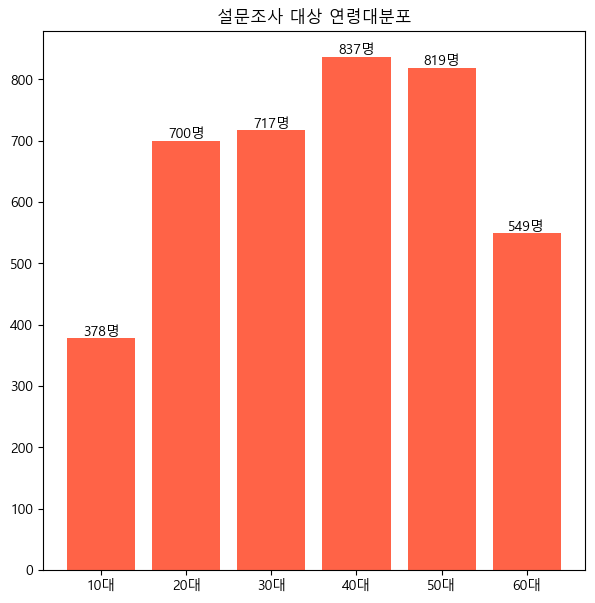

In [112]:
import matplotlib.pyplot as plt


plt.figure(figsize = (7,7))
plt.rcParams['font.family']= 'Malgun Gothic'

x = ['10대', '20대', '30대', '40대', '50대', '60대']
y = [378, 700, 717, 837, 819, 549]


for i,j in enumerate(y):
    plt.text(i,j+10,str(j)+'명', ha= 'center', va= 'center')
    


plt.bar(x,y, color = 'tomato')
plt.title('설문조사 대상 연령대분포')

In [239]:
age_total = pd.DataFrame({
    '10대' : [378],
    '20대' : [700],
    '30대' :[717],
    '40대' : [837],
    '50대' : [819],
    '60대' : [549]
})



# age_total['합계']=age_total.iloc[0].sum()
age_total

10대  20대  30대  40대  50대  60대
0  378  700  717  837  819  549

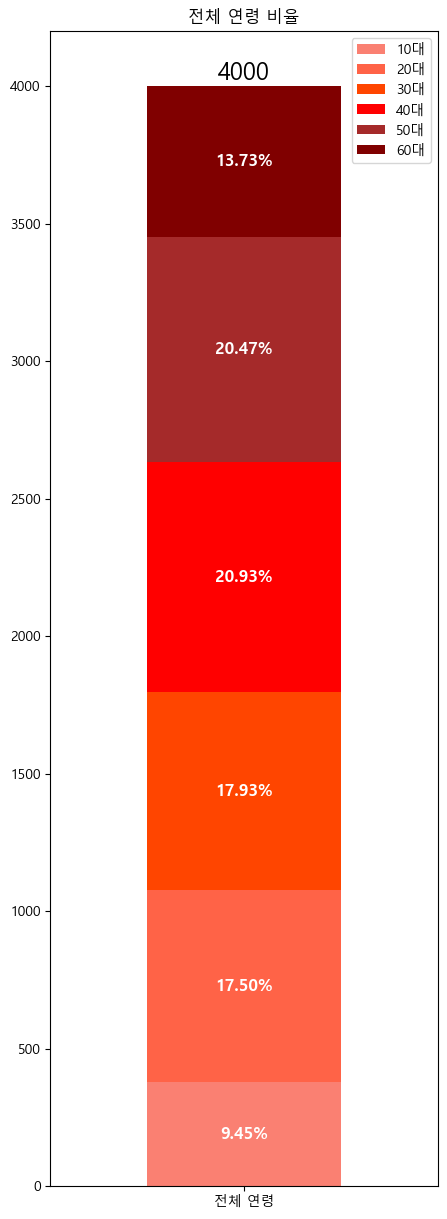

In [254]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

colors = ['salmon', 'tomato','orangered', 'red', 'brown', 'maroon']

age_total.plot(figsize = (5,15), stacked = True, kind = 'bar', color = colors)


plt.text(0, 4045, str(age_total.iloc[0].sum()), ha = 'center', va = 'center', fontsize = 17)

for i,row in enumerate(age_total.iterrows()):
    region,values = row
    total = values.sum()
    start_point = 0

    for catagory, value in values.items():
        ratio = value/total * 100
        if ratio >0:
            plt.text(i, start_point + (value/2), f'{ratio:.2f}%', ha = 'center', va = 'center', fontsize = 12, color = 'white', fontweight= 'bold')
        start_point+=value


plt.gca().set_xticklabels(['전체 연령'])
plt.xticks(rotation = 0)
plt.title('전체 연령 비율')


#import os

# os.chdir('저장경로')
# plt.savefiga('저장이름.형식')


plt.show()

In [241]:
groups = engagement.groupby('성별')

for i,row in groups:
    print(f'{i} : {row['성별'].count()}')
    #1 : 남
    #2 : 여

1 : 2022
2 : 1978


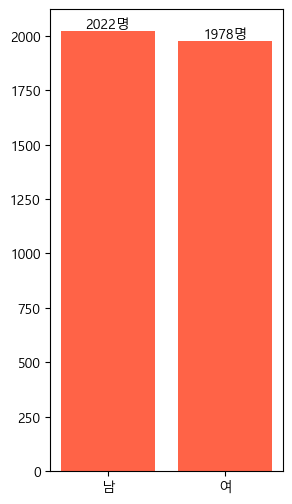

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize = (3,6))
plt.rcParams['font.family'] = 'Malgun Gothic'

x = ['남', '여']
y = [2022, 1978]

 
plt.bar(x,y, color = 'tomato')

for i,j in enumerate(y):
    plt.text(i,j+30,str(j)+'명', va = 'center', ha = 'center')

In [245]:
sex_total = pd.DataFrame({
    '남' : [2022],
    '여' : [1978]
})

sex_total

남     여
0  2022  1978

Text(0.5, 1.0, '전체 연령 분포')

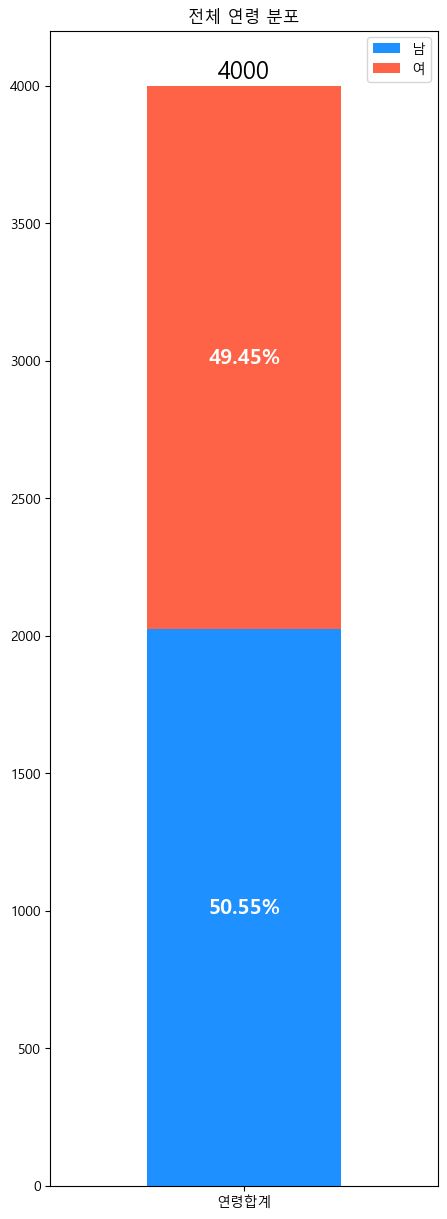

In [253]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

colors = ['dodgerblue','tomato']

sex_total.plot(figsize = (5,15), stacked = True, kind = 'bar', color = colors)

plt.text(0,4050, str(4000), ha = 'center', va = 'center', fontsize = 17)


for i,row in enumerate(sex_total.iterrows()):
    region, values = row
    total = valeus.sum()
    start_point = 0

    for categoty, value in values.items():
        ratio = value /total *100
        if ratio>0:
            plt.text(i, start_point+(value/2), f'{ratio:.2f}%', ha = 'center', va = 'center', color = 'white', fontsize = 15, fontweight = 'bold')
        start_point +=value


plt.gca().set_xticklabels(['연령합계'])
plt.xticks(rotation = 0)

plt.title('전체 연령 분포')

In [258]:
#연령별 사용빈도
en_media = total_df.loc[:,'key':'온라인 동영상 시청 빈도']
en_media

key  성별  연령  거주지  직업  월평균카드사용액  최종학력  정기적인월소득여부  주택형태  결혼여부  ...  \
0        A1   1   1    1   6         1     8          2     3     2  ...   
1        A2   1   1    1   6        99     8          2     2     2  ...   
2        A3   1   1    1   6         1     8          2     2     2  ...   
3        A4   1   1    1   6        99     8          2     2     2  ...   
4        A5   1   1    1   6         1     8          2     2     2  ...   
...     ...  ..  ..  ...  ..       ...   ...        ...   ...   ...  ...   
3995  A3996   2   5    4   4         1     3          1     3     3  ...   
3996  A3997   2   6    4   5         4     4          2     1     1  ...   
3997  A3998   2   6    4   4         1     3          1     1     1  ...   
3998  A3999   2   6    4   4         1     3          1     3     3  ...   
3999  A4000   2   6    4   5         2     4          2     1     1  ...   

      케이블 TV 시청빈도  IPTV VOD 서비스 이용빈도  라디오 청취 빈도  DMB시청 빈도  인터넷 이용빈도  \
0               1                  6          6         6       4.0   
1               4                  5          6         6       3.0   
2               3                  6          6         6       1.0   
3               4                  6          6         6       6.0   
4               1                  5          6         6       4.0   
...           ...                ...        ...       ...       ...   
3995            1                  3          3         4       6.0   
3996            3                  6          6         6       6.0   
3997            3                  6          4         6       6.0   
3998            3                  6          6         6       6.0   
3999            3                  6          6         6       6.0   

      모바일 인터넷 이용빈도  SNS이용 빈도  신문/인터넷 신문 열독빈도  인터넷 및 종이잡지 읽은 빈도  온라인 동영상 시청 빈도  
0              1.0         6               6                 6              4  
1              1.0         6               6                 6              4  
2              1.0         4               3                 6              4  
3              3.0         1               6                 6              6  
4              1.0         1               6                 6              1  
...            ...       ...             ...               ...            ...  
3995           5.0         1               6                 6              4  
3996           2.0         6               6                 6              6  
3997           5.0         2               6                 6              6  
3998           4.0         6               4                 6              6  
3999           3.0         4               4                 6              6  

[4000 rows x 23 columns]

In [ ]:
# 1단계: 정통/디지털 미디어 항목 분리
# 전체 데이터에서 정통 미디어 관련 열들만 골라서 하나의 서브데이터프레임 만듦.

# 디지털 미디어 관련 열들도 따로 골라서 또 하나 만듦.

# 이 두 개는 key 컬럼도 같이 포함해야 나중에 병합 가능함.

# ✅ 2단계: 인구정보 (연령 포함) 따로 추리기
# 전체 데이터에서 key + 연령 컬럼만 뽑아서 따로 데이터프레임을 하나 만듦.
# (필요하면 성별 등도 추가 가능하지만 지금은 연령만 있으면 충분)

# ✅ 3단계: 정통/디지털 데이터 각각 연령정보랑 병합
# key 기준으로 정통미디어 데이터랑 연령정보 병합

# key 기준으로 디지털미디어 데이터랑 연령정보 병합

# → 이제 각각 연령 + 해당 미디어 항목들이 들어있는 두 개의 데이터프레임이 됨

# ✅ 4단계: 각 항목에 대해 평균 시청빈도 계산
# 정통미디어 데이터프레임:
# 연령별로 그룹(group) 지은 다음, 미디어 항목들의 평균값 계산

# 디지털미디어도 마찬가지로 연령별로 평균값 계산

# → 이걸 하면 연령대별로 각 미디어 항목이 평균 몇 점인지 숫자화 가능

# ✅ 5단계: 항목별 평균이 아니라 "전체 평균"도 낼 수 있음
# 정통미디어 항목들 여러 개의 평균을 다시 묶어서
# 연령별 정통미디어 전체 평균 (가중치 없이 단순 평균)

# 디지털미디어도 동일하게 계산

# → 이걸로 아래 같은 테이블 만들 수 있음:

# 연령대	정통미디어 평균	디지털미디어 평균
# 10대	             2.1	5.2
# 20대               2.6	5.5
# ...	...	...

# ✅ 6단계 (선택): 해석
# 평균 수치를 코드 정의에 맞게 해석
# 예: 1=전혀 안 봄, 2=가끔 봄, 3=자주 봄 → 평균 2.3이면 “가끔 봄 수준”

# 필요 시 그래프 (선형, 막대형)으로 시각화

# 🔁 전체 로직 요약
# 정통/디지털 미디어 항목 분리

# 연령 정보 따로 추리기

# 각각 병합 (key 기준)

# 연령 기준으로 그룹 묶기

# 각 항목 평균값 계산

# 항목별이든 전체든 평균값을 해석용으로 활용